<a href="https://colab.research.google.com/github/itimes-digital/Bootcamp-Analista-de-Machine-Learning-IGTI/blob/master/desafio_modulo_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
dataset = pd.read_csv('winequality-red.csv', sep=';')
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
dataset.shape

(1599, 12)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
dataset['residual sugar'].isnull().sum()

0

In [9]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
dataset.dtypes.value_counts()[0], dataset.dtypes.value_counts().index

(11, Index([float64, int64], dtype='object'))

In [ ]:
dataset['residual sugar'].median()

2.2

In [16]:
dataset.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

In [17]:
dataset[['fixed acidity', 'pH']].corr()

,fixed acidity,pH
fixed acidity,1.000000,-0.682978
pH,-0.682978,1.000000


In [18]:
dataset[['quality', 'alcohol']].corr()

,quality,alcohol
quality,1.000000,0.476166
alcohol,0.476166,1.000000


In [19]:
dataset.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


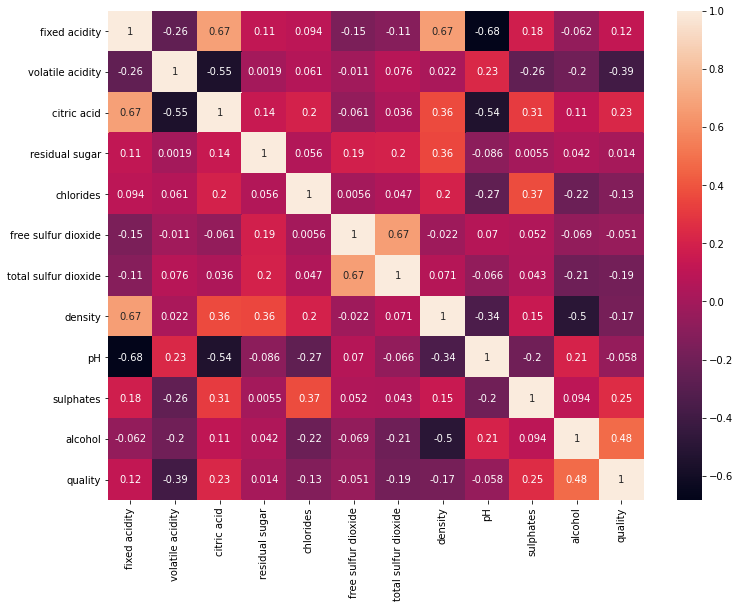

In [22]:
plt.figure(figsize=(12,9))
matriz_correlacao = dataset.corr()
sn.heatmap(matriz_correlacao, annot=True)
plt.show()

In [ ]:
dataset.query('quality == 5').count()

fixed acidity           681
volatile acidity        681
citric acid             681
residual sugar          681
chlorides               681
free sulfur dioxide     681
total sulfur dioxide    681
density                 681
pH                      681
sulphates               681
alcohol                 681
quality                 681
dtype: int64

In [56]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [70]:
previsores = dataset.iloc[:, : -1]
classe = dataset.iloc[:, -1]

In [71]:
type(previsores)

pandas.core.frame.DataFrame

In [72]:
#todas as linhas de uma coluna específica
dataset.iloc[:, 5]

0       11.0
1       25.0
2       15.0
3       17.0
4       11.0
        ... 
1594    32.0
1595    39.0
1596    29.0
1597    32.0
1598    18.0
Name: free sulfur dioxide, Length: 1599, dtype: float64

In [73]:
classe

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [74]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [75]:
scaler_prev = MinMaxScaler(feature_range=(0,1))

previsores_scaler = scaler_prev.fit(previsores)

In [76]:
previsores

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [77]:
previsores_scaler.data_max_

array([ 15.9    ,   1.58   ,   1.     ,  15.5    ,   0.611  ,  72.     ,
       289.     ,   1.00369,   4.01   ,   2.     ,  14.9    ])

In [78]:
previsores_normalizados = previsores_scaler.transform(previsores)

In [79]:
previsores_normalizados[:,0].min()

0.0

In [80]:
previsores.shape

(1599, 11)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores_normalizados, 
                                                                                              classe, 
                                                                                              random_state = 1,
                                                                                              test_size = 0.30)

In [82]:
previsores_treinamento

array([[0.31858407, 0.82876712, 0.        , ..., 0.62204724, 0.09580838,
        0.38461538],
       [0.23893805, 0.25342466, 0.1       , ..., 0.44094488, 0.08383234,
        0.32307692],
       [0.36283186, 0.49315068, 0.        , ..., 0.41732283, 0.13173653,
        0.2       ],
       ...,
       [0.17699115, 0.41438356, 0.09      , ..., 0.48031496, 0.09580838,
        0.36923077],
       [0.2300885 , 0.34931507, 0.        , ..., 0.49606299, 0.1497006 ,
        0.09230769],
       [0.39823009, 0.19178082, 0.5       , ..., 0.37007874, 0.21556886,
        0.63076923]])

Aplicando KNN

In [83]:
from sklearn.neighbors import KNeighborsClassifier

clf_KNN = KNeighborsClassifier(n_neighbors=5)

clf_KNN.fit(previsores_treinamento, classe_treinamento)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
previsoes = clf_KNN.predict(previsores_teste)

In [85]:
precisao = accuracy_score(classe_teste, previsoes)

In [86]:
precisao

0.5645833333333333

Aplicando Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier

clf_arvore = DecisionTreeClassifier()

clf_arvore.fit(previsores_treinamento, classe_treinamento)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [88]:
previsoes = clf_arvore.predict(previsores_teste)

In [89]:
precisao = accuracy_score(classe_teste, previsoes)

In [90]:
precisao

0.5916666666666667

Aplicando Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

clf_floresta.fit(previsores_treinamento, classe_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [92]:
previsoes = clf_floresta.predict(previsores_teste)

In [93]:
precisao = accuracy_score(classe_teste, previsoes)

In [94]:
precisao

0.6791666666666667

Aplicando SVM

In [95]:
from sklearn.svm import SVC

clf_svm = SVC(gamma='auto',kernel='rbf')

clf_svm.fit(previsores_treinamento, classe_treinamento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [96]:
previsoes = clf_svm.predict(previsores_teste)

In [97]:
precisao = accuracy_score(classe_teste, previsoes)

In [98]:
precisao

0.5854166666666667

Aplicando Rede MLP

In [ ]:
previsores_treinamento.shape

(1119, 11)

In [ ]:
classe_treinamento.shape

(1119,)

In [100]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(alpha=1e5, 
                        hidden_layer_sizes=(5, 5), 
                        random_state=1)

In [101]:
clf_mlp.fit(previsores_treinamento, classe_treinamento)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=100000.0, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 5), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [102]:
previsoes = clf_mlp.predict(previsores_teste)

In [103]:
clf_mlp.score(previsores_teste, classe_teste)

0.40625

In [104]:
precisao = accuracy_score(classe_teste, previsoes)

In [ ]:
precisao

0.40625

Aplicando Random Forest com LabelEnconder

In [109]:
dataset_label = dataset

In [110]:
dataset_label['quality'] = dataset_label['quality'].replace([6,7,8], 1) # vinho bom
dataset_label['quality'] = dataset_label['quality'].replace([3,4,5], 0) # vinho ruim

In [111]:
dataset_label.head(100)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.7,0.600,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,1
96,6.8,0.775,0.00,3.0,0.102,8.0,23.0,0.9965,3.45,0.56,10.7,0
97,7.0,0.500,0.25,2.0,0.070,3.0,22.0,0.9963,3.25,0.63,9.2,0
98,7.6,0.900,0.06,2.5,0.079,5.0,10.0,0.9967,3.39,0.56,9.8,0


In [112]:
previsores = dataset.iloc[:, 0:11].values
classe = dataset.iloc[:, 11].values

In [113]:
scaler_prev = MinMaxScaler(feature_range=(0,1))

previsores = scaler_prev.fit_transform(previsores)

In [114]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, 
                                                                                              classe, 
                                                                                              random_state = 1,
                                                                                              test_size = 0.30)

In [115]:
from sklearn.ensemble import RandomForestClassifier

clf_floresta = RandomForestClassifier(max_depth=10, random_state=1)

clf_floresta.fit(previsores_treinamento, classe_treinamento)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [116]:
previsoes = clf_floresta.predict(previsores_teste)

In [117]:
precisao = accuracy_score(classe_teste, previsoes)

In [118]:
precisao

0.8041666666666667